In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns 
%matplotlib inline

In [6]:
base_data=pd.read_excel('customer_churn_large_dataset.xlsx')

In [7]:
base_data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [9]:
base_data.shape

(100000, 9)

In [11]:
base_data.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [13]:
base_data.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [14]:
base_data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


Avg Subscription Month is 12 months
Avg Monthly Bill is 65.05USD

In [16]:
base_data['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

#data is balanced

In [18]:
100*base_data['Churn'].value_counts()/len(base_data['Churn'])

0    50.221
1    49.779
Name: Churn, dtype: float64

Above Value Are In Percentage

Text(0.5, 1.0, 'count of target variable per category')

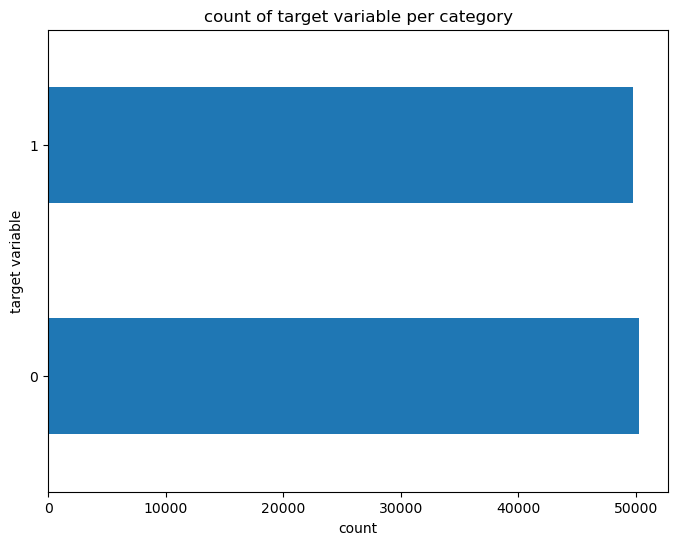

In [23]:
base_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("count")
plt.ylabel("target variable")
plt.title("count of target variable per category")

In [24]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


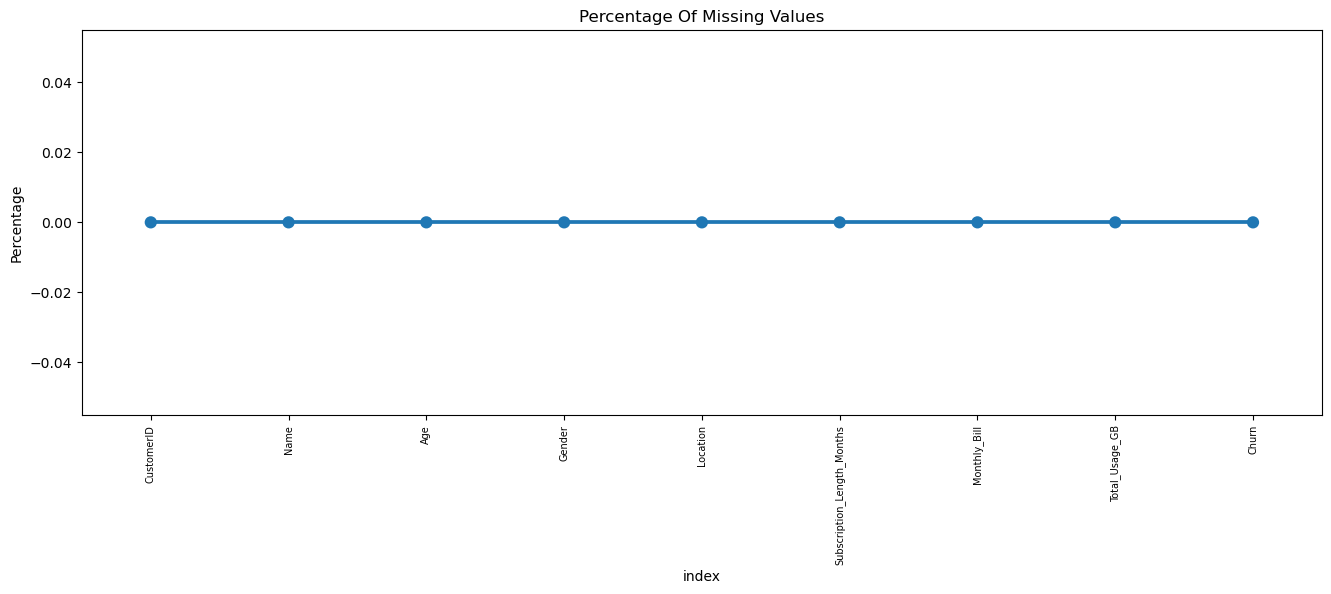

In [28]:
#Plot To Check Percentage Of Missing Values
missing=pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.ylabel("Percentage")
plt.title("Percentage Of Missing Values")
plt.show()

We Can See There Are No Missing Values In The Dataset

# DATA CLEANING

Creating A Copy For Manupluating and Processing

In [94]:
base_datacop=base_data.copy()

In [95]:
base_datacop.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

Creating bins for Subscription Length Months

In [96]:
#Get The Max Tenure 
print(base_datacop['Subscription_Length_Months'].max())

24


In [122]:
#Group The Subscription_Months In Bins Of 3 Months
labels=["{0}-{1}".format(i,i+2) for i in range(1,24,3)]
base_datacop["Subscription_group"]=pd.cut(base_datacop.Subscription_Length_Months,range(1,25,3),right=False,labels=labels[:-1])

In [123]:
base_datacop["Subscription_group"].value_counts()

1-3      12611
19-21    12563
10-12    12506
13-15    12489
16-18    12464
4-6      12453
7-9      12451
Name: Subscription_group, dtype: int64

Creation Bins For Age 

In [125]:
#Group The Age In Bins Of 10 year
labels=["{0}-{1}".format(i,i+9) for i in range(17,70,10)]
base_datacop["Age_group"]=pd.cut(base_datacop.Age,range(1,70,10),right=False,labels=labels)

In [126]:
base_datacop["Age_group"].value_counts()

67-76    18966
57-66    18932
47-56    18864
37-46    18757
27-36     5666
17-26        0
Name: Age_group, dtype: int64

Remove The Columns Which Is Not Required

In [127]:
base_datacop.drop(columns=['CustomerID','Name','Subscription_Length_Months','Age'],axis=1,inplace=True)
base_datacop.head()

,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Subscription_group,Age_group
0,Male,Los Angeles,73.36,236,0,16-18,NaN
1,Female,New York,48.76,172,0,1-3,NaN
2,Female,Los Angeles,85.47,460,0,4-6,37-46
3,Female,Miami,97.94,297,1,1-3,47-56
4,Female,Miami,58.14,266,0,19-21,57-66


Exploratory Data Analysis

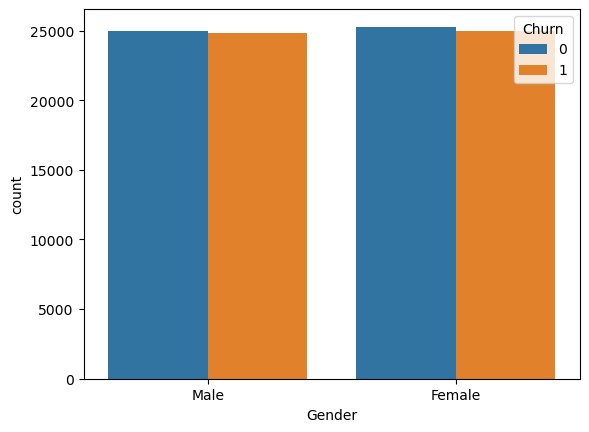

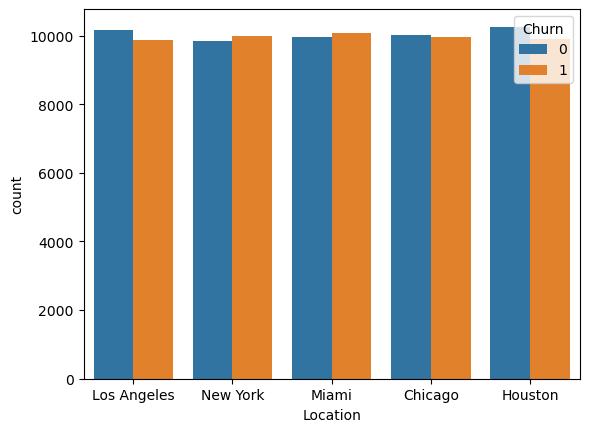

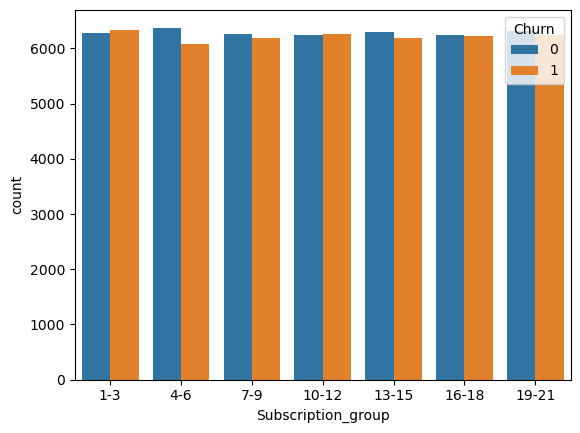

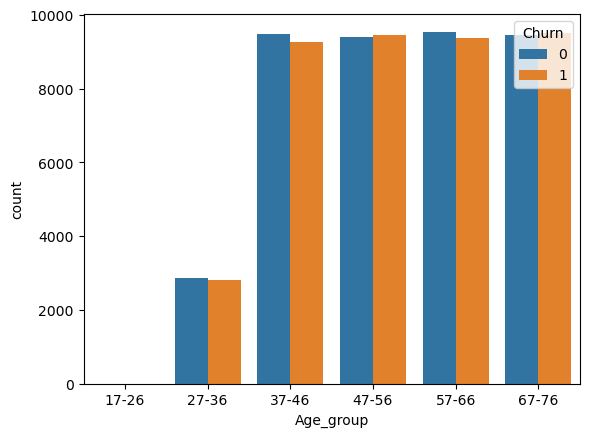

In [128]:
for i ,predictor in enumerate(base_datacop.drop(columns=['Churn','Monthly_Bill','Total_Usage_GB'])):
    plt.figure(i)
    sns.countplot(data=base_datacop,x=predictor,hue='Churn')

Convert Categorical Variables Into  Dummy Variables

In [129]:
base_datacop_dummies=pd.get_dummies(base_datacop)
base_datacop_dummies.head()

,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,...,Subscription_group_10-12,Subscription_group_13-15,Subscription_group_16-18,Subscription_group_19-21,Age_group_17-26,Age_group_27-36,Age_group_37-46,Age_group_47-56,Age_group_57-66,Age_group_67-76
0,73.36,236,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,48.76,172,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,85.47,460,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,97.94,297,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,58.14,266,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

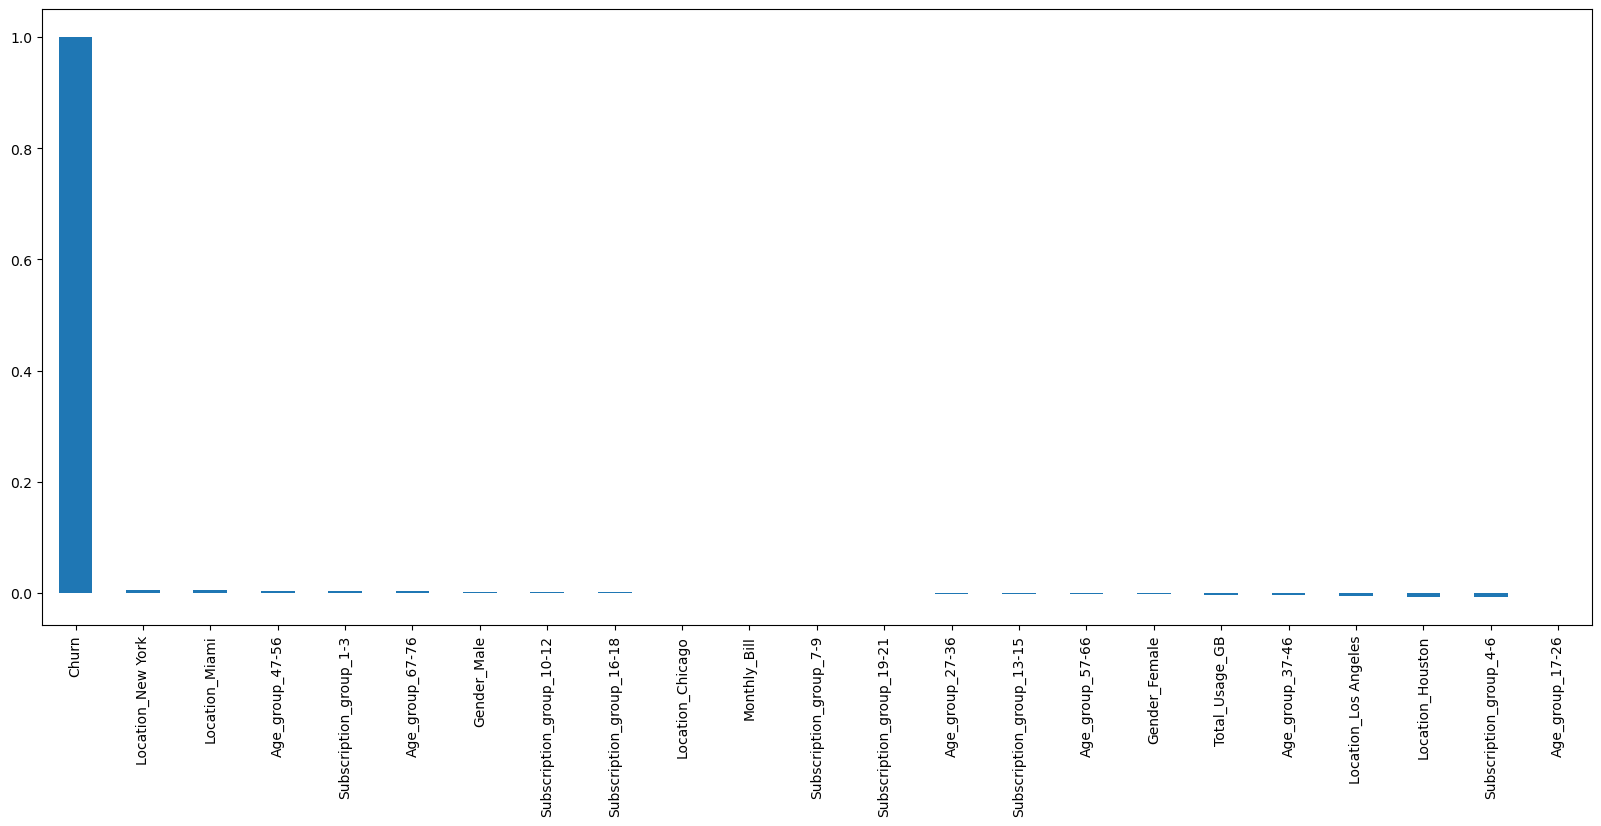

In [130]:
#Correlation Of all predicitions with churn
plt.figure(figsize=(20,8))
base_datacop_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

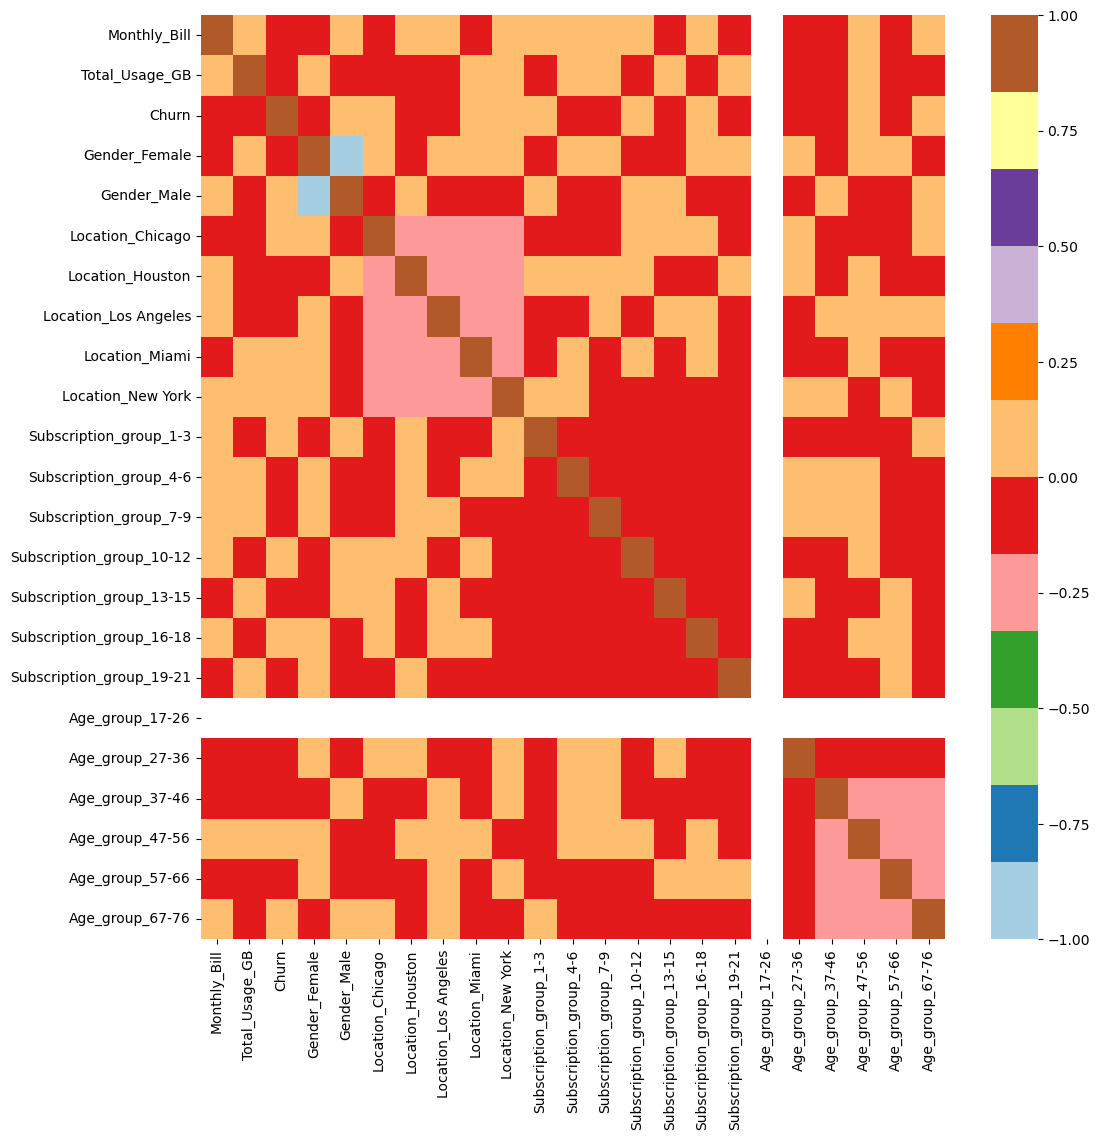

In [131]:
#Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(base_datacop_dummies.corr(),cmap="Paired")

Bivariate Analysis

In [132]:
new_df1_target0=base_datacop.loc[base_datacop['Churn']==0]
new_df1_target1=base_datacop.loc[base_datacop['Churn']==1]

In [134]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    temp=pd.Series(data=hue)
    fig, ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value.counts().index,hue=hue,palette='bright')
    plt.show()
    

In [137]:
base_datacop_dummies.to_csv('base_churn.csv')